In [1]:
#!pip install hazm

In [2]:
import numpy as np
import pandas as pd


In [3]:
import nltk
nltk.download('reuters')
import nltk
import pandas as pd
from nltk.corpus import reuters

# Download the Reuters dataset if it hasn't been downloaded yet

# Get a list of all document ids in the dataset
doc_ids = reuters.fileids()

# Create a list of dictionaries, where each dictionary represents a document
docs_list = []
for doc_id in doc_ids:
    doc_dict = {}
    doc_dict['id'] = doc_id
    doc_dict['text'] = reuters.raw(doc_id)
    doc_dict['categories'] = reuters.categories(doc_id)
    docs_list.append(doc_dict)

# Convert the list of dictionaries into a pandas DataFrame
df = pd.DataFrame(docs_list)

[nltk_data] Downloading package reuters to /root/nltk_data...


In [4]:
df

,id,text,categories
0,test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade]
1,test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain]
2,test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]"
3,test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,"[corn, grain, rice, rubber, sugar, tin, trade]"
4,test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,"[palm-oil, veg-oil]"
...,...,...,...
10783,training/999,U.K. MONEY MARKET SHORTAGE FORECAST REVISED DO...,"[interest, money-fx]"
10784,training/9992,KNIGHT-RIDDER INC &lt;KRN> SETS QUARTERLY\n Q...,[earn]
10785,training/9993,TECHNITROL INC &lt;TNL> SETS QUARTERLY\n Qtly...,[earn]
10786,training/9994,NATIONWIDE CELLULAR SERVICE INC &lt;NCEL> 4TH ...,[earn]


In [5]:
mask = df.isnull()

# Drop rows with null values
clean_df = df.dropna(axis=0)

# Drop columns with null values
clean_df = df.dropna(axis=1)
df=clean_df

In [6]:
mask[mask['id']==True]

,id,text,categories


In [7]:
df['text'] = df['text'].str.lower()


In [8]:
df

,id,text,categories
0,test/14826,asian exporters fear damage from u.s.-japan ri...,[trade]
1,test/14828,china daily says vermin eat 7-12 pct grain sto...,[grain]
2,test/14829,japan to revise long-term energy demand downwa...,"[crude, nat-gas]"
3,test/14832,thai trade deficit widens in first quarter\n ...,"[corn, grain, rice, rubber, sugar, tin, trade]"
4,test/14833,indonesia sees cpo price rising sharply\n ind...,"[palm-oil, veg-oil]"
...,...,...,...
10783,training/999,u.k. money market shortage forecast revised do...,"[interest, money-fx]"
10784,training/9992,knight-ridder inc &lt;krn> sets quarterly\n q...,[earn]
10785,training/9993,technitrol inc &lt;tnl> sets quarterly\n qtly...,[earn]
10786,training/9994,nationwide cellular service inc &lt;ncel> 4th ...,[earn]


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get all Reuters articles
text = df['text']
# Define English stop words from NLTK corpus
stop_words = set(stopwords.words('english'))

for i in range(len(df['text'])):
    #raw_text = reuters.raw(text[i])
    tokens = word_tokenize(df['text'][i])
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    df['text'][i] = filtered_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
df

,id,text,categories
0,test/14826,asian exporters fear damage u.s.-japan rift mo...,[trade]
1,test/14828,china daily says vermin eat 7-12 pct grain sto...,[grain]
2,test/14829,japan revise long-term energy demand downwards...,"[crude, nat-gas]"
3,test/14832,thai trade deficit widens first quarter thaila...,"[corn, grain, rice, rubber, sugar, tin, trade]"
4,test/14833,indonesia sees cpo price rising sharply indone...,"[palm-oil, veg-oil]"
...,...,...,...
10783,training/999,u.k. money market shortage forecast revised ba...,"[interest, money-fx]"
10784,training/9992,knight-ridder inc & lt ; krn > sets quarterly ...,[earn]
10785,training/9993,technitrol inc & lt ; tnl > sets quarterly qtl...,[earn]
10786,training/9994,nationwide cellular service inc & lt ; ncel > ...,[earn]


In [11]:
import string
import re

#text = re.sub('['+string.punctuation+']', '', text)

In [12]:
for i in range(len(df['text'])):
    df['text'][i] = re.sub('['+string.punctuation+']', '', df['text'][i])
df

,id,text,categories
0,test/14826,asian exporters fear damage usjapan rift mount...,[trade]
1,test/14828,china daily says vermin eat 712 pct grain stoc...,[grain]
2,test/14829,japan revise longterm energy demand downwards ...,"[crude, nat-gas]"
3,test/14832,thai trade deficit widens first quarter thaila...,"[corn, grain, rice, rubber, sugar, tin, trade]"
4,test/14833,indonesia sees cpo price rising sharply indone...,"[palm-oil, veg-oil]"
...,...,...,...
10783,training/999,uk money market shortage forecast revised bank...,"[interest, money-fx]"
10784,training/9992,knightridder inc lt krn sets quarterly qtly...,[earn]
10785,training/9993,technitrol inc lt tnl sets quarterly qtly d...,[earn]
10786,training/9994,nationwide cellular service inc lt ncel 4th...,[earn]


In [13]:
#!pip install spacy

In [14]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

for i in range(len(df['text'])):
    sentence=df['text'][i]
    words = sentence.split()
    stemmed_words = [lemmatizer.lemmatize(word) for word in words]
    stemmed_sentence = ' '.join(stemmed_words)
    df['text'][i]=stemmed_sentence


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [15]:
df['text']

0        asian exporter fear damage usjapan rift mounti...
1        china daily say vermin eat 712 pct grain stock...
2        japan revise longterm energy demand downwards ...
3        thai trade deficit widens first quarter thaila...
4        indonesia see cpo price rising sharply indones...
                               ...                        
10783    uk money market shortage forecast revised bank...
10784    knightridder inc lt krn set quarterly qtly div...
10785    technitrol inc lt tnl set quarterly qtly div 1...
10786    nationwide cellular service inc lt ncel 4th qt...
10787    lt aha automotive technology corp year net shr...
Name: text, Length: 10788, dtype: object

In [16]:
import nltk
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
for i in range(len(df['text'])):
    sentence=df['text'][i]
    words = sentence.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    stemmed_sentence = ' '.join(stemmed_words)
    df['text'][i]=stemmed_sentence

In [17]:
import re
for i in range(len(df['text'])):
    string_with_non_alpha = df['text'][i]

    # Remove non-alphabetic characters using regex
    string_without_non_alpha = re.sub(r'[^a-zA-Z\s]', '', string_with_non_alpha)
    df['text'][i]=string_without_non_alpha

In [18]:
df['text']

0        asian export fear damag usjapan rift mount tra...
1        china daili say vermin eat  pct grain stock su...
2        japan revis longterm energi demand downward mi...
3        thai trade deficit widen first quarter thailan...
4        indonesia see cpo price rise sharpli indonesia...
                               ...                        
10783    uk money market shortag forecast revis bank en...
10784    knightridd inc lt krn set quarterli qtli div  ...
10785    technitrol inc lt tnl set quarterli qtli div  ...
10786    nationwid cellular servic inc lt ncel th qtr s...
10787    lt aha automot technolog corp year net shr  ct...
Name: text, Length: 10788, dtype: object

In [19]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

for i in range(len(df['text'])):
    df['text'][i] = remove_html_tags(df['text'][i])
    

In [20]:
df['text']

0        asian export fear damag usjapan rift mount tra...
1        china daili say vermin eat  pct grain stock su...
2        japan revis longterm energi demand downward mi...
3        thai trade deficit widen first quarter thailan...
4        indonesia see cpo price rise sharpli indonesia...
                               ...                        
10783    uk money market shortag forecast revis bank en...
10784    knightridd inc lt krn set quarterli qtli div  ...
10785    technitrol inc lt tnl set quarterli qtli div  ...
10786    nationwid cellular servic inc lt ncel th qtr s...
10787    lt aha automot technolog corp year net shr  ct...
Name: text, Length: 10788, dtype: object

In [21]:
import re

def remove_urls(text):
    return re.sub(r'http\S+', '', text)

for i in range(len(df['text'])):
    df['text'][i] = remove_urls(df['text'][i])
df['text']

0        asian export fear damag usjapan rift mount tra...
1        china daili say vermin eat  pct grain stock su...
2        japan revis longterm energi demand downward mi...
3        thai trade deficit widen first quarter thailan...
4        indonesia see cpo price rise sharpli indonesia...
                               ...                        
10783    uk money market shortag forecast revis bank en...
10784    knightridd inc lt krn set quarterli qtli div  ...
10785    technitrol inc lt tnl set quarterli qtli div  ...
10786    nationwid cellular servic inc lt ncel th qtr s...
10787    lt aha automot technolog corp year net shr  ct...
Name: text, Length: 10788, dtype: object

In [22]:
import nltk
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [23]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.tree import Tree
import pandas as pd

# Sample data
#data = {'Text': ['John Smith works at Google', 'Mary Johnson lives in New York']}
# Create DataFrame
#df = pd.DataFrame(data)
# Function to extract named entities

In [24]:

def extract_entities(text):
    entities = []
    for sentence in nltk.sent_tokenize(text):
        #print(sentence)
        #print('\n')
        chunks = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sentence)))
        for chunk in chunks:
            entities.append(chunk)

            #if isinstance(chunk, Tree):
                #entities.append(' '.join([token[0] for token in chunk]))
    #print(entities)
    return entities

In [25]:
import nltk
nltk.download('words')
nltk.download('averaged_perceptron_tagger')
#print(df['text'][0])
#df['NamedEntities'] = extract_entities(df['text'][0])
df['NamedEntities'] = df['text'].apply(extract_entities)

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [26]:
df.head()

,id,text,categories,NamedEntities
0,test/14826,asian export fear damag usjapan rift mount tra...,[trade],"[(asian, JJ), (export, NN), (fear, NN), (damag..."
1,test/14828,china daili say vermin eat pct grain stock su...,[grain],"[(china, NN), (daili, NNS), (say, VBP), (vermi..."
2,test/14829,japan revis longterm energi demand downward mi...,"[crude, nat-gas]","[(japan, NN), (revis, VBP), (longterm, JJ), (e..."
3,test/14832,thai trade deficit widen first quarter thailan...,"[corn, grain, rice, rubber, sugar, tin, trade]","[(thai, NN), (trade, NN), (deficit, NN), (wide..."
4,test/14833,indonesia see cpo price rise sharpli indonesia...,"[palm-oil, veg-oil]","[(indonesia, NN), (see, VBP), (cpo, JJ), (pric..."


In [27]:
dicto={}
for i in range(len(df)):
    for item in df['categories'][i]:
        if item not in dicto:
            dicto[item] = 1
        else:
            dicto[item] += 1


<Axes: xlabel='category', ylabel='value'>

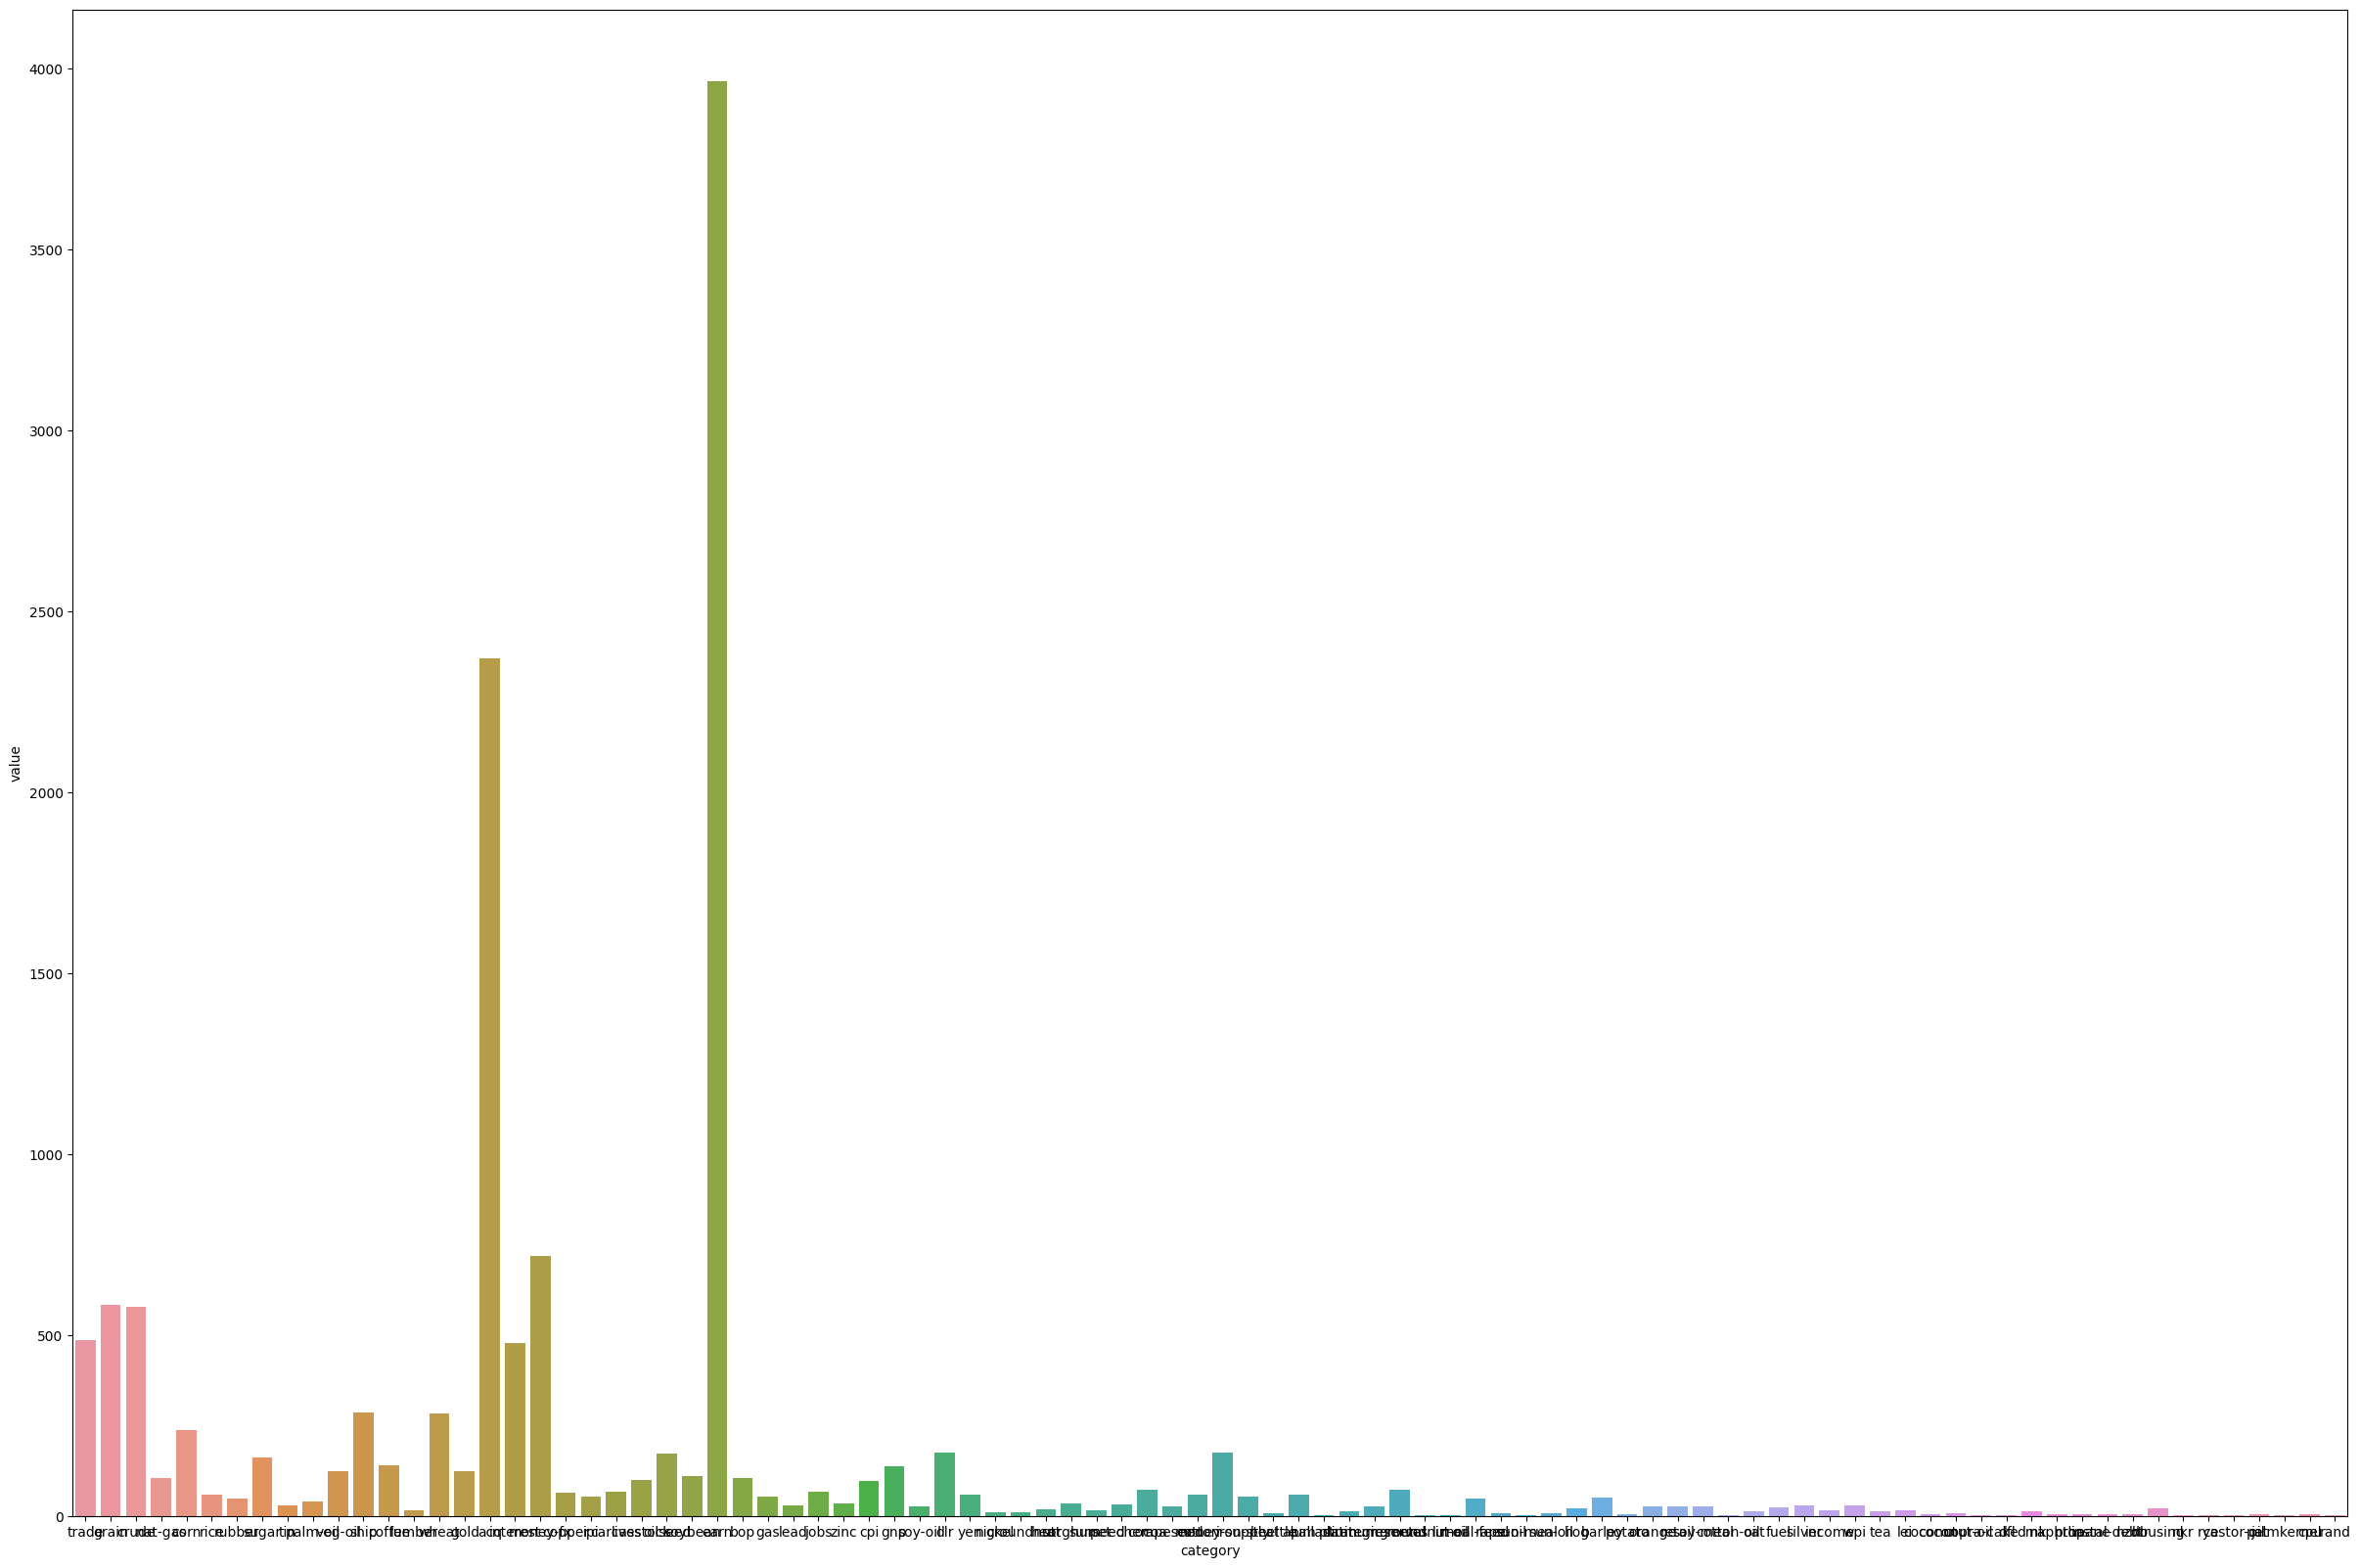

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
key_list=[]
val_list=[]
for key,value in dicto.items():
    key_list.append(key)
    val_list.append(value)
data = {'category': key_list,
        'value': val_list}
df_dicto = pd.DataFrame(data)

plt.figure(figsize=(30,20))
# Create a barplot of the data
sns.barplot(x='category', y='value', data=df_dicto)

In [29]:
import pandas as pd

# Load the dataset from a CSV file
#df = pd.read_csv('your_dataset.csv')

# Create an empty dataframe
new_df = pd.DataFrame(columns=df.columns)

# Loop through each row in the original dataframe
for index, row in df.iterrows():
    # Get the categories for the current row
    categories = row['categories']
    # Loop through each category
    for category in categories:
        # Create a new row with the current category and other data from the original row
        new_row = {'id': row['id'], 'text': row['text'], 'categories': [category]}
        # Append the new row to the new dataframe
        new_df = new_df.append(new_row, ignore_index=True)

# Save the new dataframe to a CSV file
#new_df.to_csv('new_dataset.csv', index=False)
new_df

Streaming output truncated to the last 5000 lines.
<ipython-input-29-52ecceef3f4f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-29-52ecceef3f4f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-29-52ecceef3f4f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-29-52ecceef3f4f>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = new_df.append(new_row, ignore_index=True)
<ipython-input-29-52ecceef3f4f>:18: FutureWarning: The frame.

,id,text,categories,NamedEntities
0,test/14826,asian export fear damag usjapan rift mount tra...,[trade],NaN
1,test/14828,china daili say vermin eat pct grain stock su...,[grain],NaN
2,test/14829,japan revis longterm energi demand downward mi...,[crude],NaN
3,test/14829,japan revis longterm energi demand downward mi...,[nat-gas],NaN
4,test/14832,thai trade deficit widen first quarter thailan...,[corn],NaN
...,...,...,...,...
13323,training/999,uk money market shortag forecast revis bank en...,[money-fx],NaN
13324,training/9992,knightridd inc lt krn set quarterli qtli div ...,[earn],NaN
13325,training/9993,technitrol inc lt tnl set quarterli qtli div ...,[earn],NaN
13326,training/9994,nationwid cellular servic inc lt ncel th qtr s...,[earn],NaN


In [30]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
new_df["categories"] = new_df["categories"].apply(lambda x: x[0])

In [32]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target
X = new_df['text'].values
y = new_df['categories'].values

# Oversample the minority classes
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X.reshape(-1, 1), y)

# Undersample the majority class
undersample = RandomUnderSampler(sampling_strategy='majority')
X_balanced, y_balanced = undersample.fit_resample(X_over, y_over)

# Combine balanced X and y into a new dataframe
df_balanced = pd.DataFrame({'text': X_balanced.ravel(), 'categories': y_balanced})
df_balanced

,text,categories
0,sumitomo bank aim quick recoveri merger sumito...,acq
1,bond corp still consid atla mine bailout bond ...,acq
2,cra sold forrest gold mln dlr whim creek lt w...,acq
3,anheuserbusch join bid san miguel anheuserbusc...,acq
4,monier say britain s redland may bid diversifi...,acq
...,...,...
13323,houston metal mine yield posit result lt houst...,zinc
13324,uk lead zinc offtak rise januari uk consumpt l...,zinc
13325,zinc produc approach ec voluntari closur numbe...,zinc
13326,hecla lt hl buy mine stake bp lt bp unit hecla...,zinc


In [33]:
d = {} 
for index, row in df_balanced.iterrows():
    category = row['categories']
    if category in d:
        d[category] += 1
    else:
        d[category] = 1

<Axes: xlabel='category', ylabel='value'>

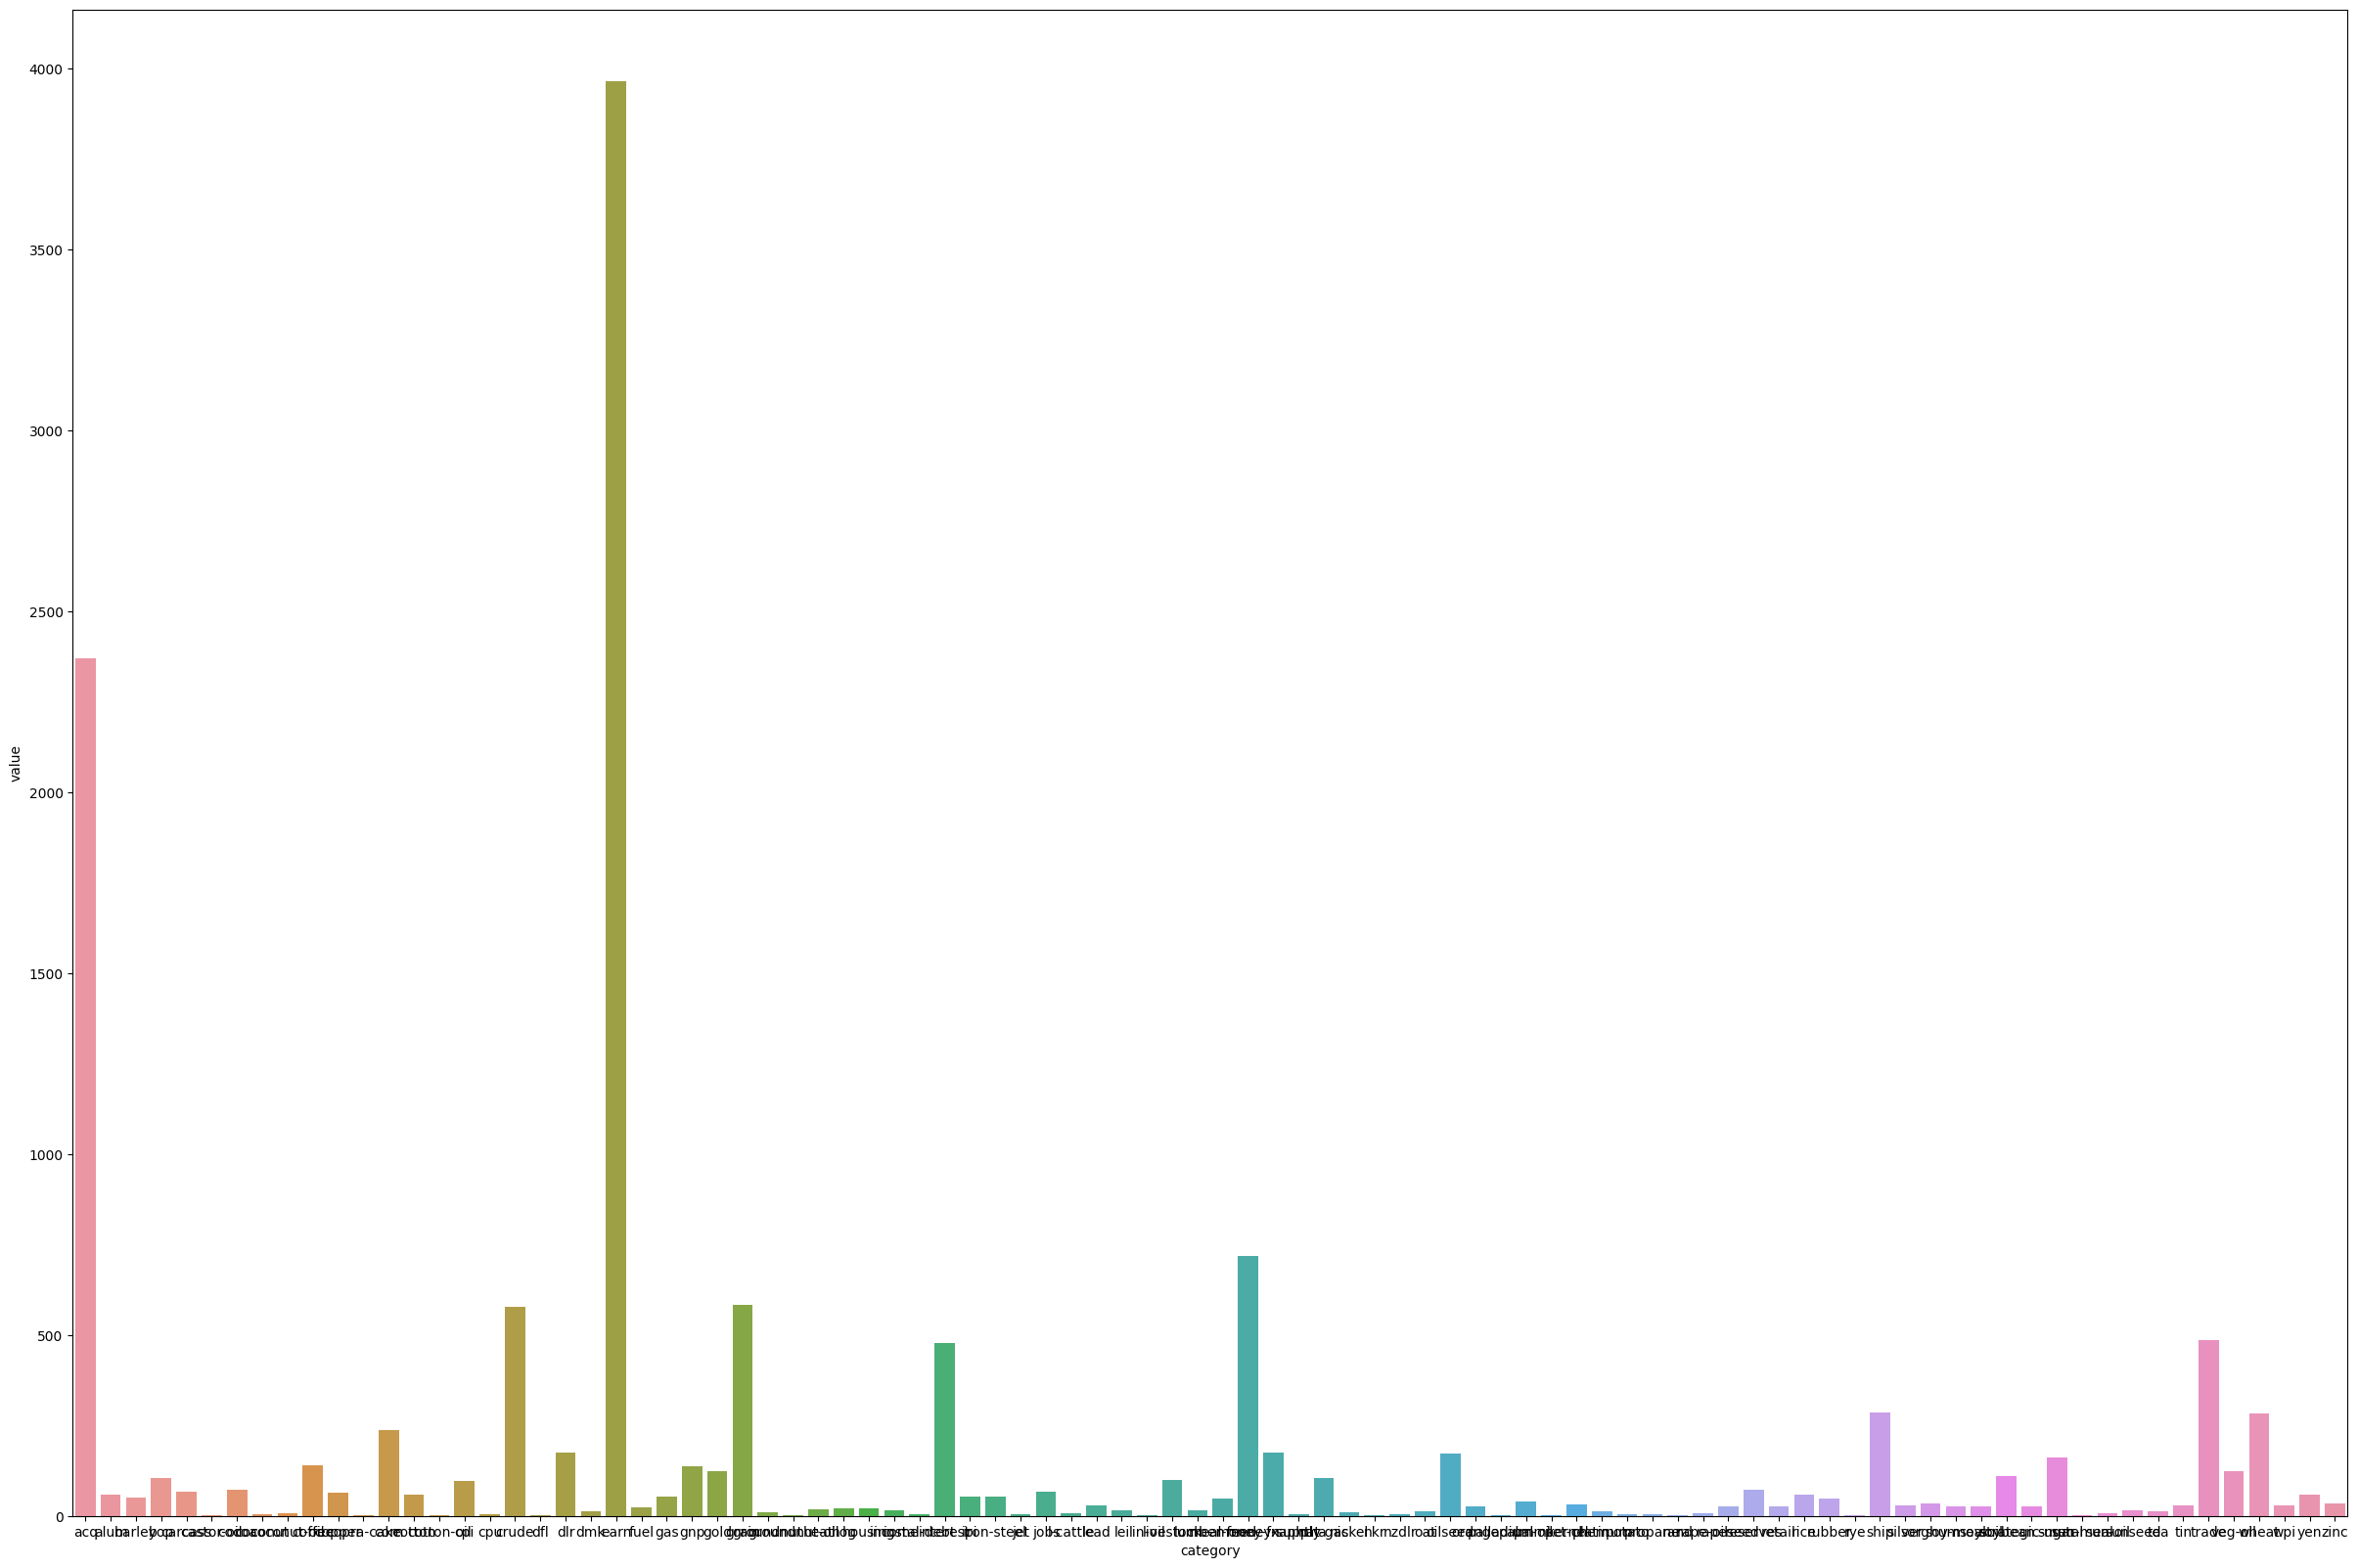

In [34]:
key_list=[]
val_list=[]
for key,value in d.items():
    key_list.append(key)
    val_list.append(value)
data = {'category': key_list,
        'value': val_list}
df_d = pd.DataFrame(data)

plt.figure(figsize=(30,20))
# Create a barplot of the data
sns.barplot(x='category', y='value', data=df_d)

In [35]:
df_balanced

,text,categories
0,sumitomo bank aim quick recoveri merger sumito...,acq
1,bond corp still consid atla mine bailout bond ...,acq
2,cra sold forrest gold mln dlr whim creek lt w...,acq
3,anheuserbusch join bid san miguel anheuserbusc...,acq
4,monier say britain s redland may bid diversifi...,acq
...,...,...
13323,houston metal mine yield posit result lt houst...,zinc
13324,uk lead zinc offtak rise januari uk consumpt l...,zinc
13325,zinc produc approach ec voluntari closur numbe...,zinc
13326,hecla lt hl buy mine stake bp lt bp unit hecla...,zinc


In [36]:
!pip install summa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for summa: filename=summa-1.2.0-py3-none-any.whl size=54389 sha256=412dedf085c38ae7b1370407b5b9169ebdb4f16238d7758fc755d0627b25985e
  Stored in directory: /root/.cache/pip/wheels/4a/ca/c5/4958614cfba88ed6ceb7cb5a849f9f89f9ac49971616bc919f
Successfully built summa


In [37]:
from summa import keywords


In [38]:
text = """Automatic summarization is the process of reducing a text document with a \
computer program in order to create a summary that retains the most important points \
of the original document. As the problem of information overload has grown, and as \
the quantity of data has increased, so has interest in automatic summarization. \
Technologies that can make a coherent summary take into account variables such as \
length, writing style and syntax. An example of the use of summarization technology \
is search engines such as Google. Document summarization is another."""

kw = keywords.keywords(text)
print(kw)

document
automatic summarization
technologies
technology


In [39]:
!pip install yake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                  id                                               text  \
0         test/14826  asian export fear damag usjapan rift mount tra...   
1         test/14828  china daili say vermin eat  pct grain stock su...   
2         test/14829  japan revis longterm energi demand downward mi...   
3         test/14832  thai trade deficit widen first quarter thailan...   
4         test/14833  indonesia see cpo price rise sharpli indonesia...   
...              ...                                                ...   
10783   training/999  uk money market shortag forecast revis bank en...   
10784  training/9992  knightridd inc lt krn set quarterli qtli div  ...   
10785  training/9993  technitrol inc lt tnl set quarterli qtli div  ...   
10786  training/9994  nationwid cellular servic inc lt ncel th qtr s...   
10787  training/9995  lt aha automot technolog corp year net shr  ct...   

                                           categories  \
0                                         

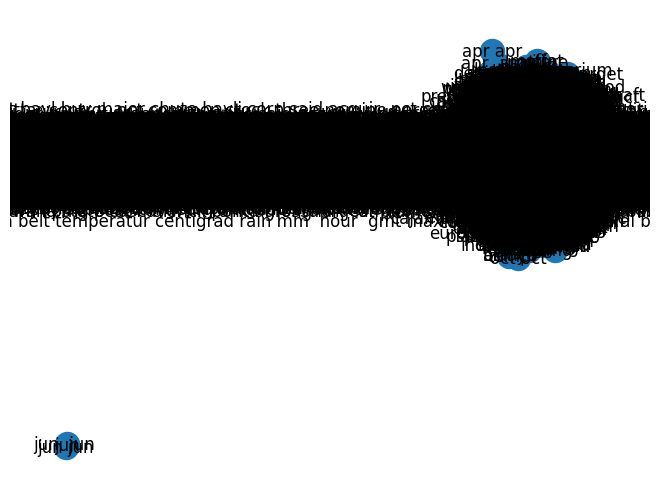

In [40]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import networkx as nx
import numpy as np
import yake
import pandas as pd
import matplotlib.pyplot as plt

# download required nltk modules
nltk.download('punkt')
nltk.download('stopwords')

# Initialize YAKE keyword extractor and define TextRank keyword function
kw_extractor = yake.KeywordExtractor()
def get_keyword_rank(text, window_size=2, top_n=10):
    # tokenize text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # remove stopwords and punctuation marks
    stop_words = set(stopwords.words('english') + list(punctuation))
    filtered_words = []
    for sentence in words:
        filtered_sentence = []
        for word in sentence:
            if word not in stop_words:
                filtered_sentence.append(word)
        filtered_words.append(filtered_sentence)

    # create graph based on co-occurence of words within a window
    graph = nx.Graph()
    for sentence in filtered_words:
        for i, word in enumerate(sentence):
            if not graph.has_node(word):
                graph.add_node(word)
            for j in range(i+1, min(i+window_size, len(sentence))):
                other_word = sentence[j]
                if not graph.has_node(other_word):
                    graph.add_node(other_word)
                if not graph.has_edge(word, other_word):
                    graph.add_edge(word, other_word, weight=0)
                graph[word][other_word]['weight'] += 1

    # calculate TextRank scores
    scores = nx.pagerank(graph, alpha=0.85)

    # sort scores and return top N keywords
    ranked_keywords = sorted(((scores[word], word) for word in scores), reverse=True)[:top_n]

    return [keyword for score, keyword in ranked_keywords]


# Add new column 'keywords' to dataframe
df['keywords'] = df['text'].apply(get_keyword_rank)
df['yake_keywords'] = df['text'].apply(lambda x: [keyword[0] for keyword in kw_extractor.extract_keywords(x)[:5]])

# Print dataframe with added columns
print(df)

# Build document-keyword graph
graph = nx.Graph()
for i, row in df.iterrows():
    document = row['text']
    keywords = row['keywords']
    for keyword in keywords:
        if not graph.has_node(keyword):
            graph.add_node(keyword)
        if not graph.has_node(document):
            graph.add_node(document)
        if not graph.has_edge(document, keyword):
            graph.add_edge(document, keyword, weight=0)
        graph[document][keyword]['weight'] += 1

# Draw graph
pos = nx.spring_layout(graph)
nx.draw(graph, pos=pos)
labels = {node: node for node in graph.nodes()}
nx.draw_networkx_labels(graph, pos=pos, labels=labels)
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


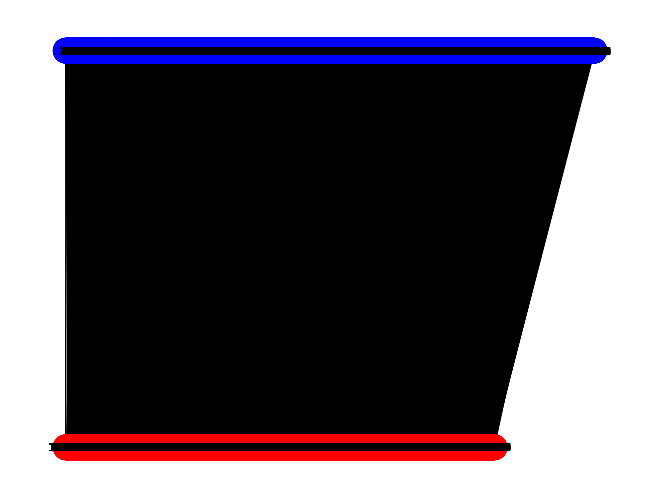

In [41]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from string import punctuation
import networkx as nx
import numpy as np
import yake
import pandas as pd
import matplotlib.pyplot as plt

# download required nltk modules
nltk.download('punkt')
nltk.download('stopwords')

# Initialize YAKE keyword extractor and define TextRank keyword function
kw_extractor = yake.KeywordExtractor()
def get_keyword_rank(text, top_n=10):
    # tokenize text into sentences and words
    sentences = sent_tokenize(text)
    words = [word_tokenize(sentence) for sentence in sentences]

    # remove stopwords and punctuation marks
    stop_words = set(stopwords.words('english') + list(punctuation))
    filtered_words = []
    for sentence in words:
        filtered_sentence = []
        for word in sentence:
            if word not in stop_words:
                filtered_sentence.append(word)
        filtered_words.append(filtered_sentence)

    # create graph based on co-occurence of words within a window
    graph = nx.Graph()
    for sentence in filtered_words:
        for i, word in enumerate(sentence):
            if not graph.has_node(word):
                graph.add_node(word)
            for j in range(i+1, min(i+2, len(sentence))):
                other_word = sentence[j]
                if not graph.has_node(other_word):
                    graph.add_node(other_word)
                if not graph.has_edge(word, other_word):
                    graph.add_edge(word, other_word, weight=0)
                graph[word][other_word]['weight'] += 1

    # calculate TextRank scores
    scores = nx.pagerank(graph, alpha=0.85)

    # sort scores and return top N keywords
    ranked_keywords = sorted(((scores[word], word) for word in scores), reverse=True)[:top_n]

    return [keyword for score, keyword in ranked_keywords]


# Add new column 'keywords' to dataframe
df['keywords'] = df['text'].apply(get_keyword_rank)
df['yake_keywords'] = df['text'].apply(lambda x: [keyword[0] for keyword in kw_extractor.extract_keywords(x)[:5]])

# Build document-keyword graph
graph = nx.Graph()
for i, row in df.iterrows():
    document = f"Doc{i+1}"  # assign numbered document name to node
    keywords = row['keywords']
    for j, keyword in enumerate(keywords):
        if not graph.has_node(keyword):
            graph.add_node(keyword, bipartite=1)  # set keyword nodes as red (bipartite=1)
        if not graph.has_node(document):
            graph.add_node(document, bipartite=0)  # set document nodes as blue (bipartite=0)
        if not graph.has_edge(document, keyword):
            graph.add_edge(document, keyword, weight=0)
        graph[document][keyword]['weight'] += 1

# Separate nodes by bipartite attribute and set node colors
top_nodes = {n for n, d in graph.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(graph) - top_nodes
node_colors = ['blue' if n in top_nodes else 'red' for n in graph.nodes()]

# Draw bipartite graph with node numbers and colors
pos = {}
pos.update((node, (i, 1)) for i, node in enumerate(sorted(top_nodes)))
pos.update((node, (j, 0)) for j, node in enumerate(sorted(bottom_nodes)))
nx.draw(graph, pos=pos, with_labels=True, labels={node: i+1 for i, node in enumerate(sorted(graph.nodes()))}, font_size=8, node_color=node_colors)
plt.show()
